## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [9]:
results = {}
for momentum in MOMENTUM:
    lr=LEARNING_RATE
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.001000, Momentum = 0.70
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/5

Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4666 - accuracy: 0.4892 - val_loss: 1.5013 - val_accuracy: 0.4687
Epoch 50/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4614 - accuracy: 0.4902 - val_loss: 1.5217 - val_accuracy: 0.4618
Experiment with LR = 0.001000, Momentum = 0.90
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________________________

Epoch 47/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.1611 - accuracy: 0.5945 - val_loss: 1.4092 - val_accuracy: 0.5047
Epoch 48/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.1539 - accuracy: 0.5940 - val_loss: 1.3837 - val_accuracy: 0.5141
Epoch 49/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.1470 - accuracy: 0.5978 - val_loss: 1.3550 - val_accuracy: 0.5226
Epoch 50/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.1372 - accuracy: 0.6025 - val_loss: 1.3296 - val_accuracy: 0.5292
Experiment with LR = 0.001000, Momentum = 0.95
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________

Epoch 45/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9151 - accuracy: 0.6809 - val_loss: 1.3952 - val_accuracy: 0.5279
Epoch 46/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9036 - accuracy: 0.6832 - val_loss: 1.3586 - val_accuracy: 0.5369
Epoch 47/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.8954 - accuracy: 0.6863 - val_loss: 1.3675 - val_accuracy: 0.5340
Epoch 48/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8785 - accuracy: 0.6933 - val_loss: 1.4853 - val_accuracy: 0.5127
Epoch 49/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.8644 - accuracy: 0.7002 - val_loss: 1.3922 - val_accuracy: 0.5316
Epoch 50/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.8577 - accuracy: 0.6998 - val_loss: 1.4519 - val_accuracy: 0.5281
Experiment with LR = 0.001000, Momentum = 0.99
Model: "model_1"
________________________________________________

Epoch 43/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.5714 - accuracy: 0.7979 - val_loss: 1.6651 - val_accuracy: 0.5359
Epoch 44/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.5488 - accuracy: 0.8058 - val_loss: 1.7681 - val_accuracy: 0.5287
Epoch 45/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.5492 - accuracy: 0.8060 - val_loss: 1.7306 - val_accuracy: 0.5343
Epoch 46/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.5311 - accuracy: 0.8119 - val_loss: 1.7532 - val_accuracy: 0.5325
Epoch 47/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.5225 - accuracy: 0.8136 - val_loss: 1.8154 - val_accuracy: 0.5220
Epoch 48/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.4959 - accuracy: 0.8239 - val_loss: 1.8979 - val_accuracy: 0.5308
Epoch 49/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.4642 - accuracy: 0.8351 - val_

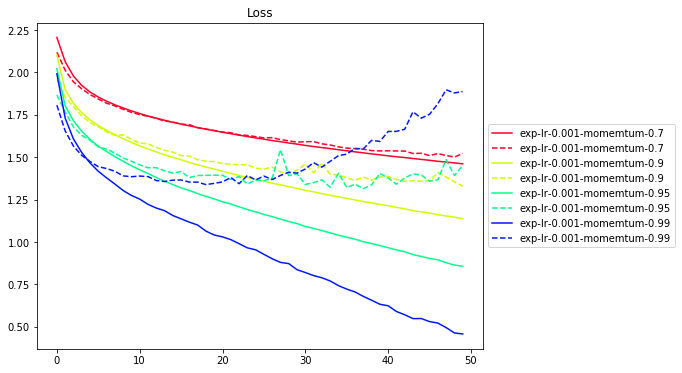

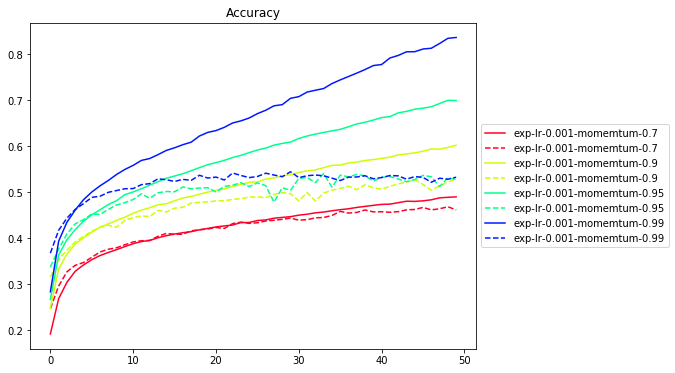

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()